## Moving Averages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from   pandas.plotting import autocorrelation_plot as acf

%matplotlib inline

In [2]:
!ls ../../../data

IBM_monthly.csv
MSFT.csv
Monthly_CO2_Concentrations.csv
Superstore.xls
^GSPC.csv
beer.csv
beerprod.dat
chemical-concentration-readings.csv
coloradoflow.dat
ffMonthly.pkl
inflation-consumer-prices-annual.csv
mean-daily-temperature-fisher-river.csv
or_monthly_mean_temp_1895-2019.csv
or_monthly_mean_temp_1895-2019.txt
sunspots.csv
us-airlines-monthly-aircraft-miles-flown.csv
us-airlines-monthly-aircraft-miles-flown.csv~


In [3]:
DATA = '../../../data'
ibm = pd.read_csv(f'{DATA}/IBM_monthly.csv', parse_dates=True)
ibm = ibm[['Date', 'Adj Close']]
ibm.rename(columns={'Adj Close': 'Close'}, inplace=True)
ibm.head()

,Date,Close
0,1962-01-01,0.598839
1,1962-02-01,0.593315
2,1962-03-01,0.588699
3,1962-04-01,0.501678
4,1962-05-01,0.433720


In [4]:
ibm['MA20'] = ibm.Close.rolling(20).mean()
ibm.head()

,Date,Close,MA20
0,1962-01-01,0.598839,NaN
1,1962-02-01,0.593315,NaN
2,1962-03-01,0.588699,NaN
3,1962-04-01,0.501678,NaN
4,1962-05-01,0.433720,NaN


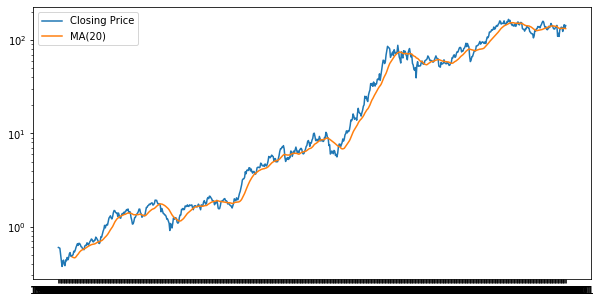

In [5]:
fig = plt.figure(figsize=(10, 5))
plt.plot(ibm.Date, ibm.Close, label='Closing Price')
plt.plot(ibm.Date, ibm.MA20, label='MA(20)')
plt.yscale('log')
plt.legend();

### Seasonal Adjustment using Moving Average

In [6]:
beer = pd.read_csv(f'{DATA}/beer.csv')
beer.head()

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [7]:
beer.rename(columns={
    'Quarterly beer production in Australia: megalitres. March 1956 ? '
    'June 1994': 'Beer_Prod'}, inplace=True)
beer.head()

,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [8]:
MA4 = beer.Beer_Prod.rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

In [9]:
resids = beer.Beer_Prod - TwoXMA4
resids = resids.loc[~pd.isnull(resids)]

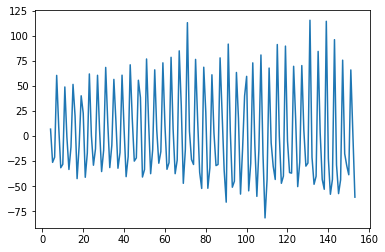

In [10]:
plt.plot(resids);

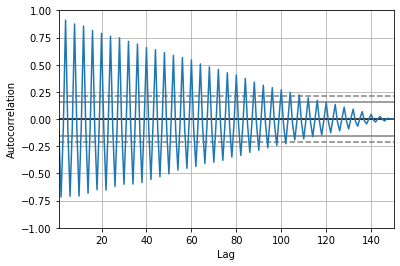

In [11]:
acf(resids);

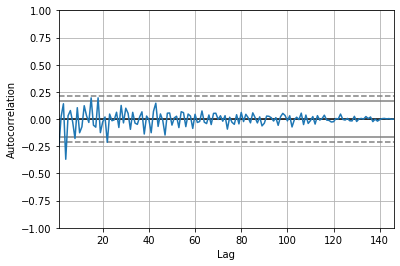

In [12]:
resids_qtr_diff = resids.diff(4)
resids_qtr_diff = resids_qtr_diff.loc[~pd.isnull(resids_qtr_diff)]
acf(resids_qtr_diff);